# The Spark Foundation
Data Science and Business Analyst #GRIPJUL2021

Author - Tejas Tanaji Bhor

Task No. 6
Title : Prediction using Decision Tree Algorithm 

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
df=pd.read_csv('Iris.csv')

In [132]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
df.shape

(150, 6)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [135]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [136]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [137]:
df.drop(columns=['Id'],inplace=True)

For EDA 

In [138]:
import sweetviz as sv

In [139]:
advert_report = sv.analyze(df)


In [140]:
advert_report.show_html('Advertising.html')

Report Advertising.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [141]:
df1 = sv.compare(df[75:], df[:75])
df1.show_html('Compare.html')


Report Compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [142]:
import seaborn as sns

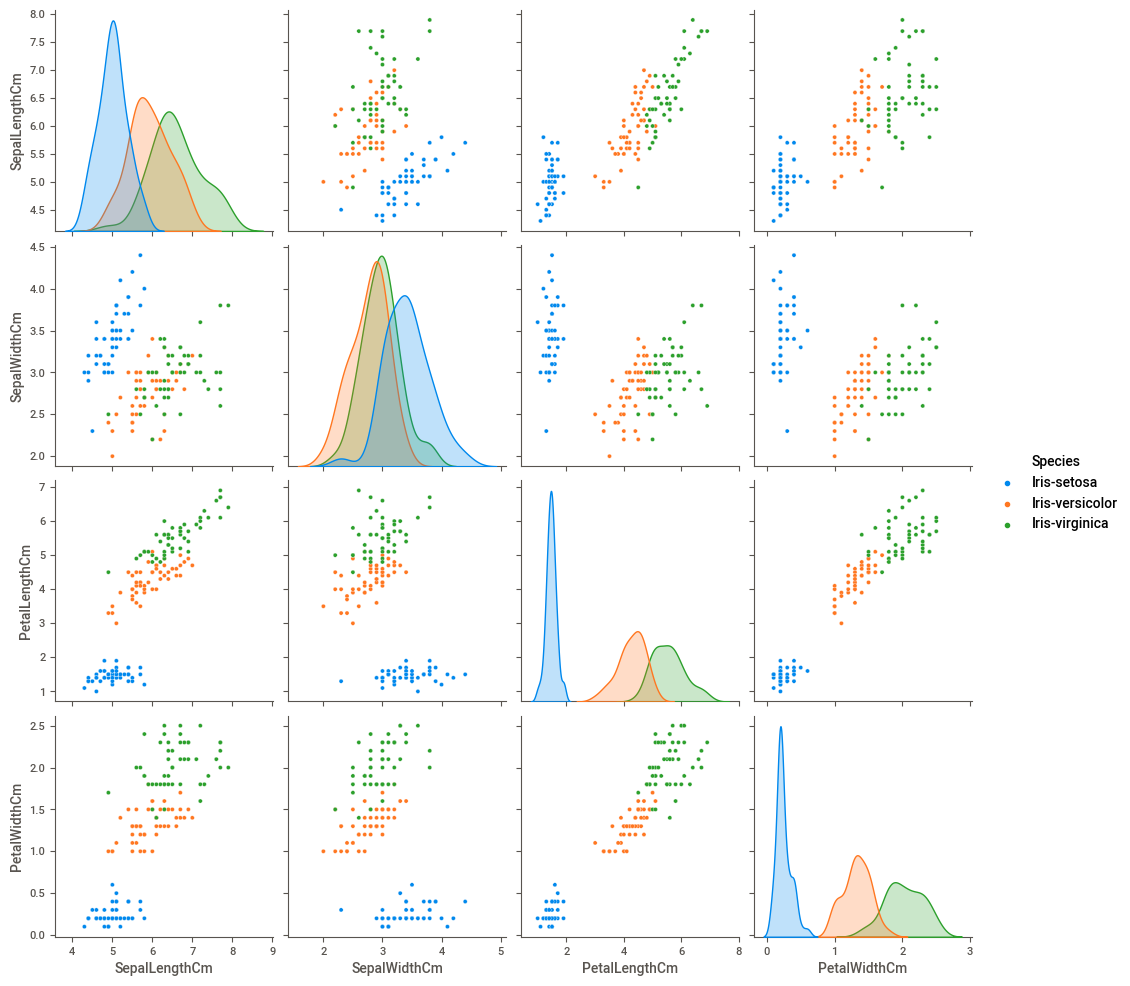

In [143]:
sns.pairplot(df,hue='Species')

In [144]:
import graphviz
import os

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import Image

from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO



In [146]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
y=df['Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [147]:
model=DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [148]:
model.score(X,y)

1.0

In [149]:
y_pred=model.predict(X_test)
score=accuracy_score(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)


In [150]:
import os

os.environ['PATH']=os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

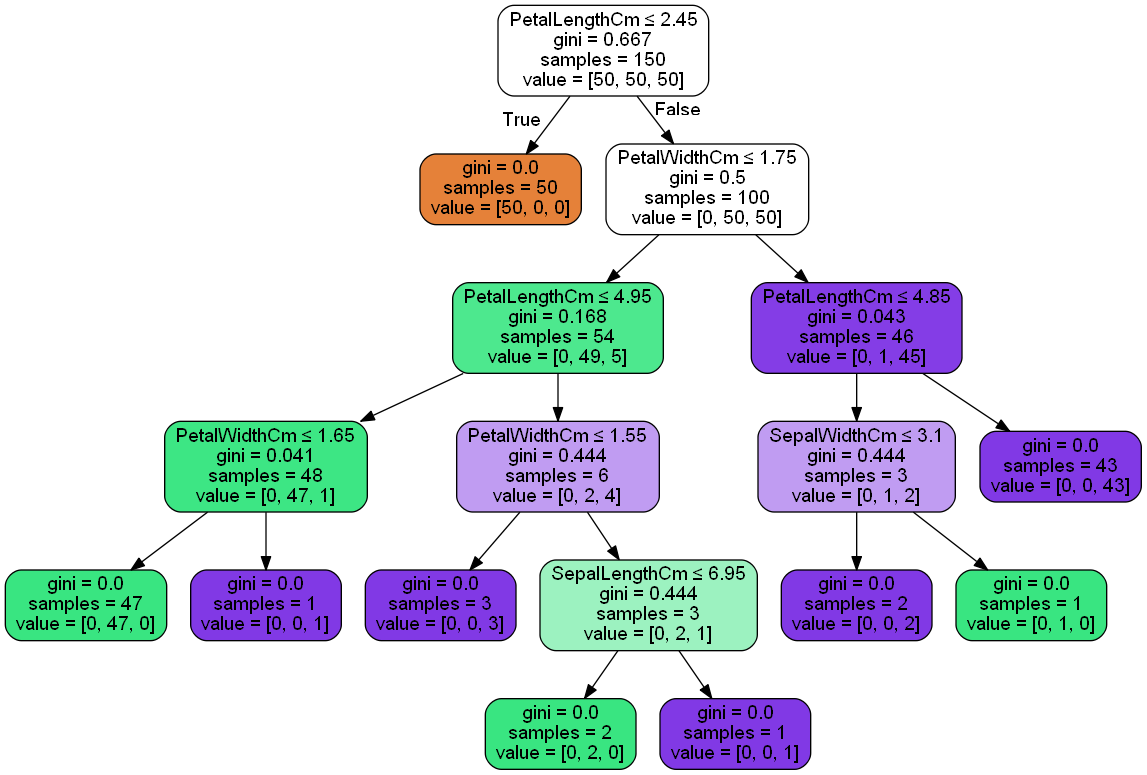

In [151]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,feature_names=X.columns,
                filled=True,rounded=True,
                special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [153]:
result=model.predict([[5.0,3.6,1.4,0.2,]])
print(f'The Species is {result[0]}')

The Species is Iris-setosa
